Example notebook showing how to use the Ensemble sampler (currently in development)

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee
import corner

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import EnsembleSampler
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood
#like = Himmelblau(2)
#prior = UniformPrior(2, -5, 5)
#like = Rosenbrock(2)
#prior = UniformPrior(2, -2, 10)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -5, 5)
#like = Eggbox(2)
#prior = UniformPrior(2, -15, 15)
#like = GaussianShell(2)
#prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#prior = UniformPrior(2, -8, 8)
like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]], weights=[0.1,1.0])
prior = UniformPrior(2, [-7, -3], [7, 3])

In [6]:
sampler = EnsembleSampler(like.x_dim, like, flow='spline', prior=prior)

Creating directory for new run logs/test/run49
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run(100, 200, bootstrap_iters=1, latent_sample=True)

[nnest.sampler] [INFO] Initial acceptance [0.2320]
[nnest.trainer] [INFO] Number of training samples [200]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0340] validation loss [0.1611]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0112] validation loss [0.0792]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0084] validation loss [0.0733]
[nnest.trainer] [INFO] Epoch [207] ran out of patience
[nnest.trainer] [INFO] Best epoch [157] validation loss [0.0692]


/Users/adammoss/opt/anaconda3/envs/nnest/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[nnest.sampler] [INFO] Step [10] acceptance [0.5015] ncalls [2000]
[nnest.sampler] [INFO] Step [20] acceptance [0.4963] ncalls [4000]
[nnest.sampler] [INFO] Step [30] acceptance [0.4882] ncalls [6000]
[nnest.sampler] [INFO] Step [40] acceptance [0.4848] ncalls [8000]
[nnest.sampler] [INFO] Acceptance [0.4824] min ESS [0.4168] max ESS [1.1185] average jump [0.4102]
Removed no burn in
[nnest.trainer] [INFO] Number of training samples [399]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0608] validation loss [0.1215]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0064] validation loss [0.0326]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0049] validation loss [0.0387]
[nnest.trainer] [INFO] Epoch [209] ran out of patience
[nnest.trainer] [INFO] Best epoch [159] validation loss [0.0296]
[nnest.sampler] [INFO] Step [10] acceptance [0.5660] ncalls [2000]
[nnest.sampler] [INFO] Step [20] acceptance [0.5580] ncalls [4000]
[nnest.sampler] [I

In [8]:
like.num_evaluations

30964

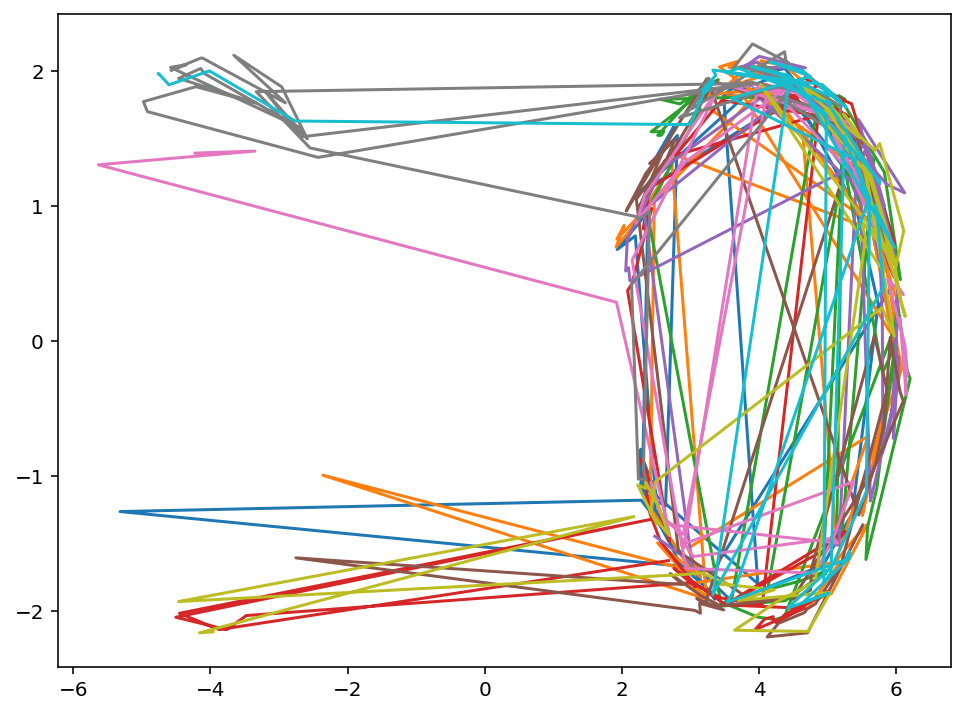

In [9]:
fig = plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(sampler.samples[i,:,0], sampler.samples[i,:,1])
plt.show()

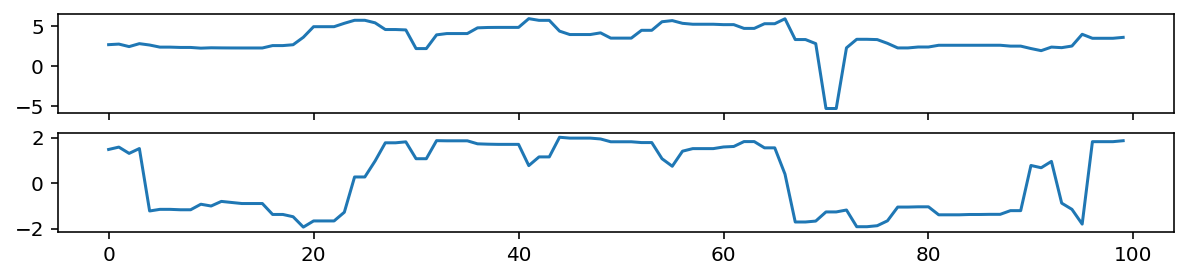

In [10]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim), sharex=True)
for i in range(like.x_dim):
    ax[i].plot(sampler.samples[0,:,i])
plt.show()

In [11]:
flat_samples = sampler.samples[:,50:,:]
flat_samples = flat_samples.reshape((-1, flat_samples.shape[2]))

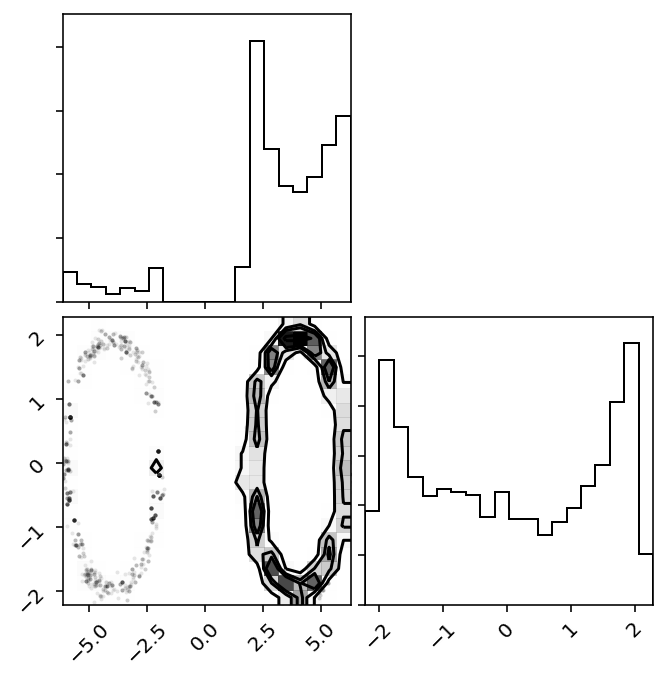

In [12]:
fig = corner.corner(flat_samples)

In [13]:
mc = MCSamples(samples=[sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])], 
               loglikes=[-sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])])

Removed no burn in


In [14]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

762.3427425906266
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      2.9620758E+00  2.9740425E+00  1.9875730E+00  5.6188294E+00  two   -6.0842304E+00  6.2761915E+00  two   -6.1333544E+00  6.3047879E+00  two     p_{1}
param2      5.5576309E-02  1.4296427E+00 -2.0754242E+00  2.1044384E+00  two   -2.1073929E+00  2.1327048E+00  two   -2.1563864E+00  2.1777219E+00  two     p_{2}



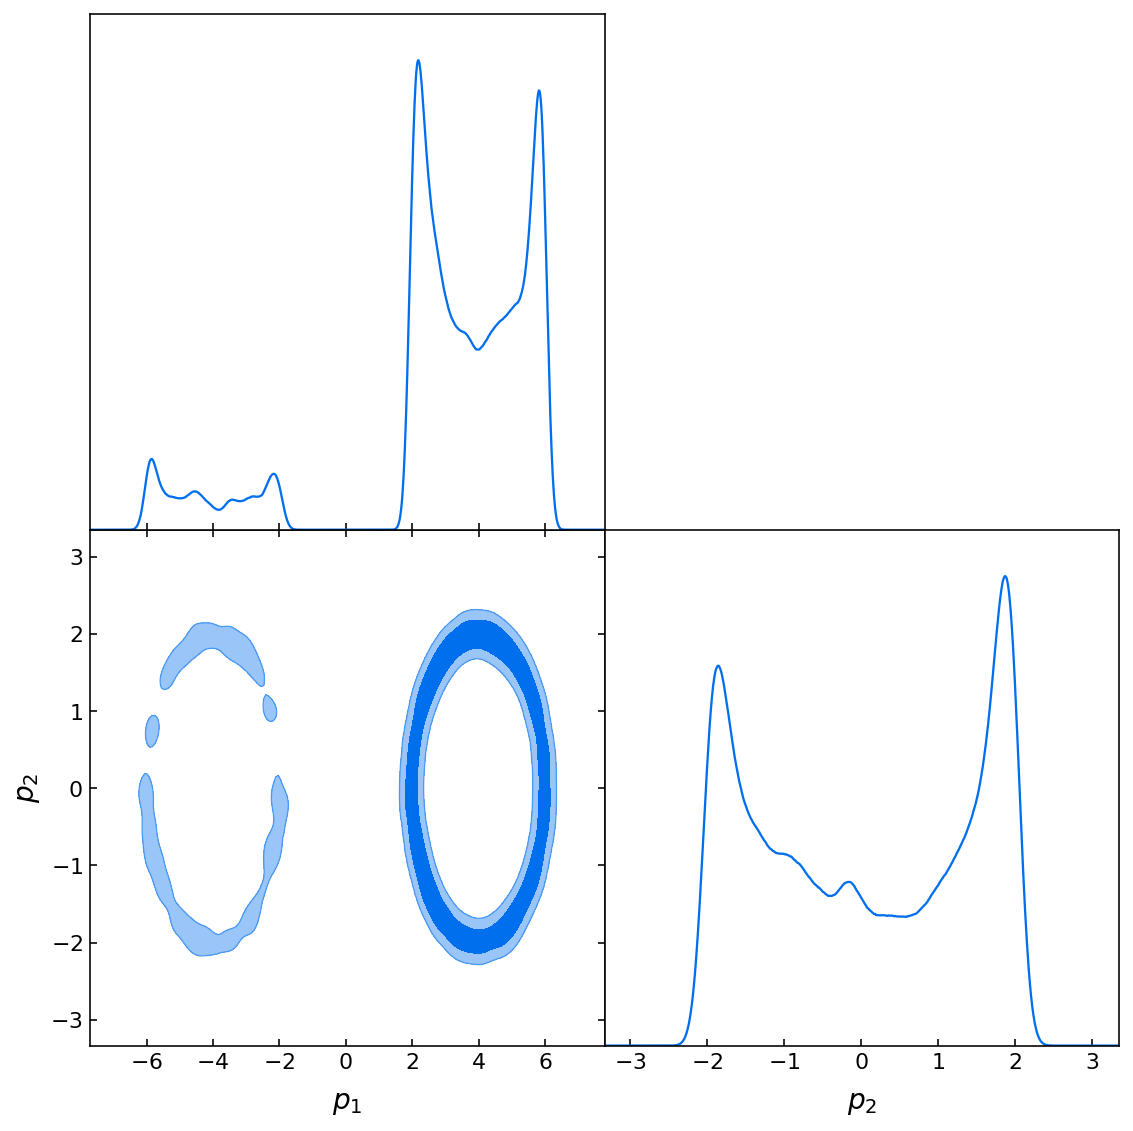

In [15]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)